In [ ]:
# !pip install plotnine

In [1]:
import pandas as pd
import plotnine as pn
import numpy as np

url = "https://raw.githubusercontent.com/tidyverse/dplyr/master/data-raw/starwars.csv"
starwars = pd.read_csv(url)

In [7]:
starwars

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...",NaN,TIE Advanced x1
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human,"A New Hope, The Empire Strikes Back, Return of...",Imperial Speeder Bike,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Finn,NaN,NaN,black,dark,dark,NaN,male,masculine,NaN,Human,The Force Awakens,NaN,NaN
83,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human,The Force Awakens,NaN,NaN
84,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human,The Force Awakens,NaN,X-wing
85,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid,The Force Awakens,NaN,NaN


In [38]:
gender_dic = {'feminine': 'Feminine', 'masculine':'Masculine', 'nan': 'No info'}

starwars_filtered = (
      starwars
      .query('mass < 1000')
      .fillna({'gender': 'nan'})
      .assign(gender = lambda x: x['gender'].map(gender_dic))
)  

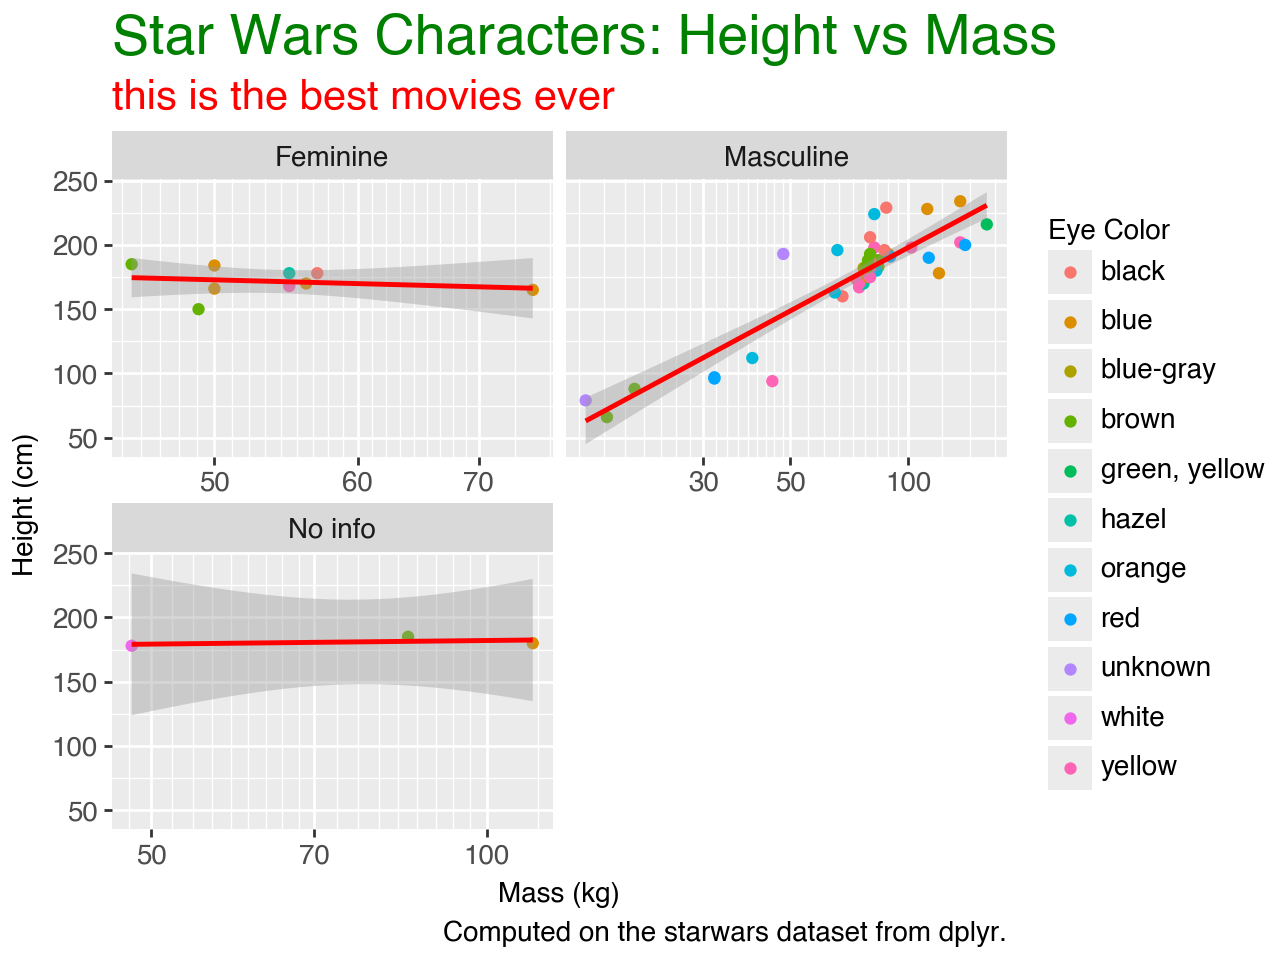

In [39]:
# data[data['mass']<1000]
(
  pn.ggplot(data=starwars_filtered)  +                             # Data
  pn.aes(x='mass', y='height')+                                    # Aesthetics
  pn.geom_point(mapping=pn.aes(color='eye_color')) +               # Geometries
  pn.geom_smooth(method='lm', color='red')+
  pn.facet_wrap('gender', nrow=2, scales='free_x')+                           # Facets
  pn.scale_x_log10()+                                  # Coordinates 
  pn.theme(
      text=pn.element_text(size=10), 
      plot_title=pn.element_text(size=20, color='green'),
      plot_subtitle=pn.element_text(size=15, color='red')
    )+              # Theme
  pn.labs(
    y='Height (cm)', x='Mass (kg)', color='Eye Color',
    title='Star Wars Characters: Height vs Mass',
    subtitle='this is the best movies ever',
    caption='Computed on the starwars dataset from dplyr.'
  )
)

/Users/frederic.loge-munerel/Library/Caches/pypoetry/virtualenvs/complex-rock-PoE7e538-py3.11/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 28 rows containing non-finite values.


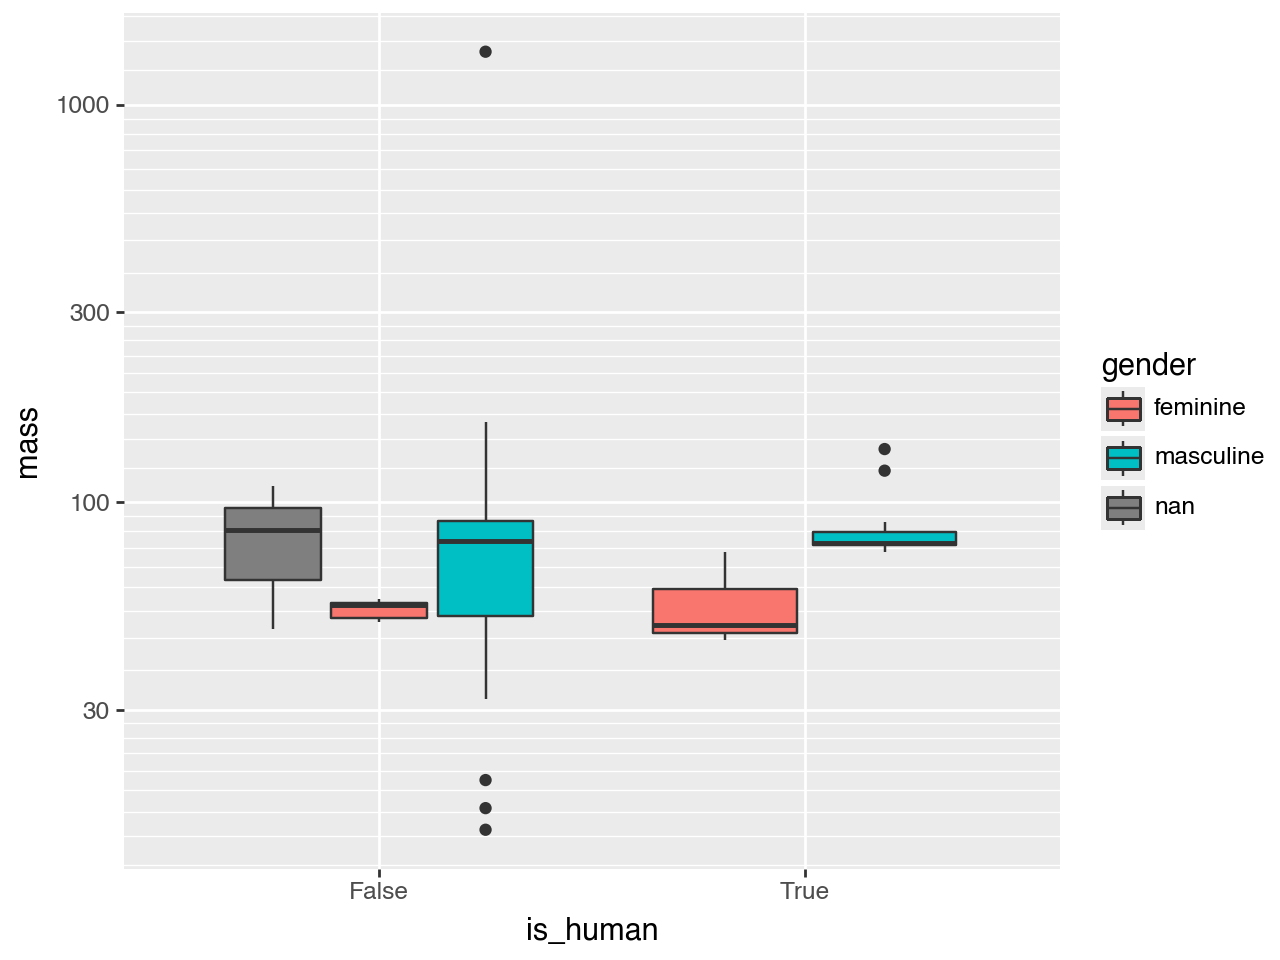

In [78]:
# GRAPH 1:
# 1-D histogram / boxplot / violin plot
# group by a quali variable -> facet, fill, etc

(
    pn.ggplot(starwars.assign(is_human=lambda df: df.species=="Human"))+
    pn.aes(y='mass', x='is_human', fill='gender')+
    pn.scale_y_log10()+
    pn.geom_boxplot()
    # geom_histogram(position='identity', alpha=0.4)+ # position arg position='identity'
    # geom_density(alpha=0)
)

Dataset
   index                   name  birth_year  idx  birth_year_2
0     18                   Yoda       896.0    0         886.0
1     15  Jabba Desilijic Tiure       600.0    1         590.0
2     12              Chewbacca       200.0    2         190.0
3      1                  C-3PO       112.0    3         102.0
4     65                  Dooku       102.0    4          92.0

Plot


/Users/frederic.loge-munerel/Library/Caches/pypoetry/virtualenvs/complex-rock-PoE7e538-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
/Users/frederic.loge-munerel/Library/Caches/pypoetry/virtualenvs/complex-rock-PoE7e538-py3.11/lib/python3.11/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.


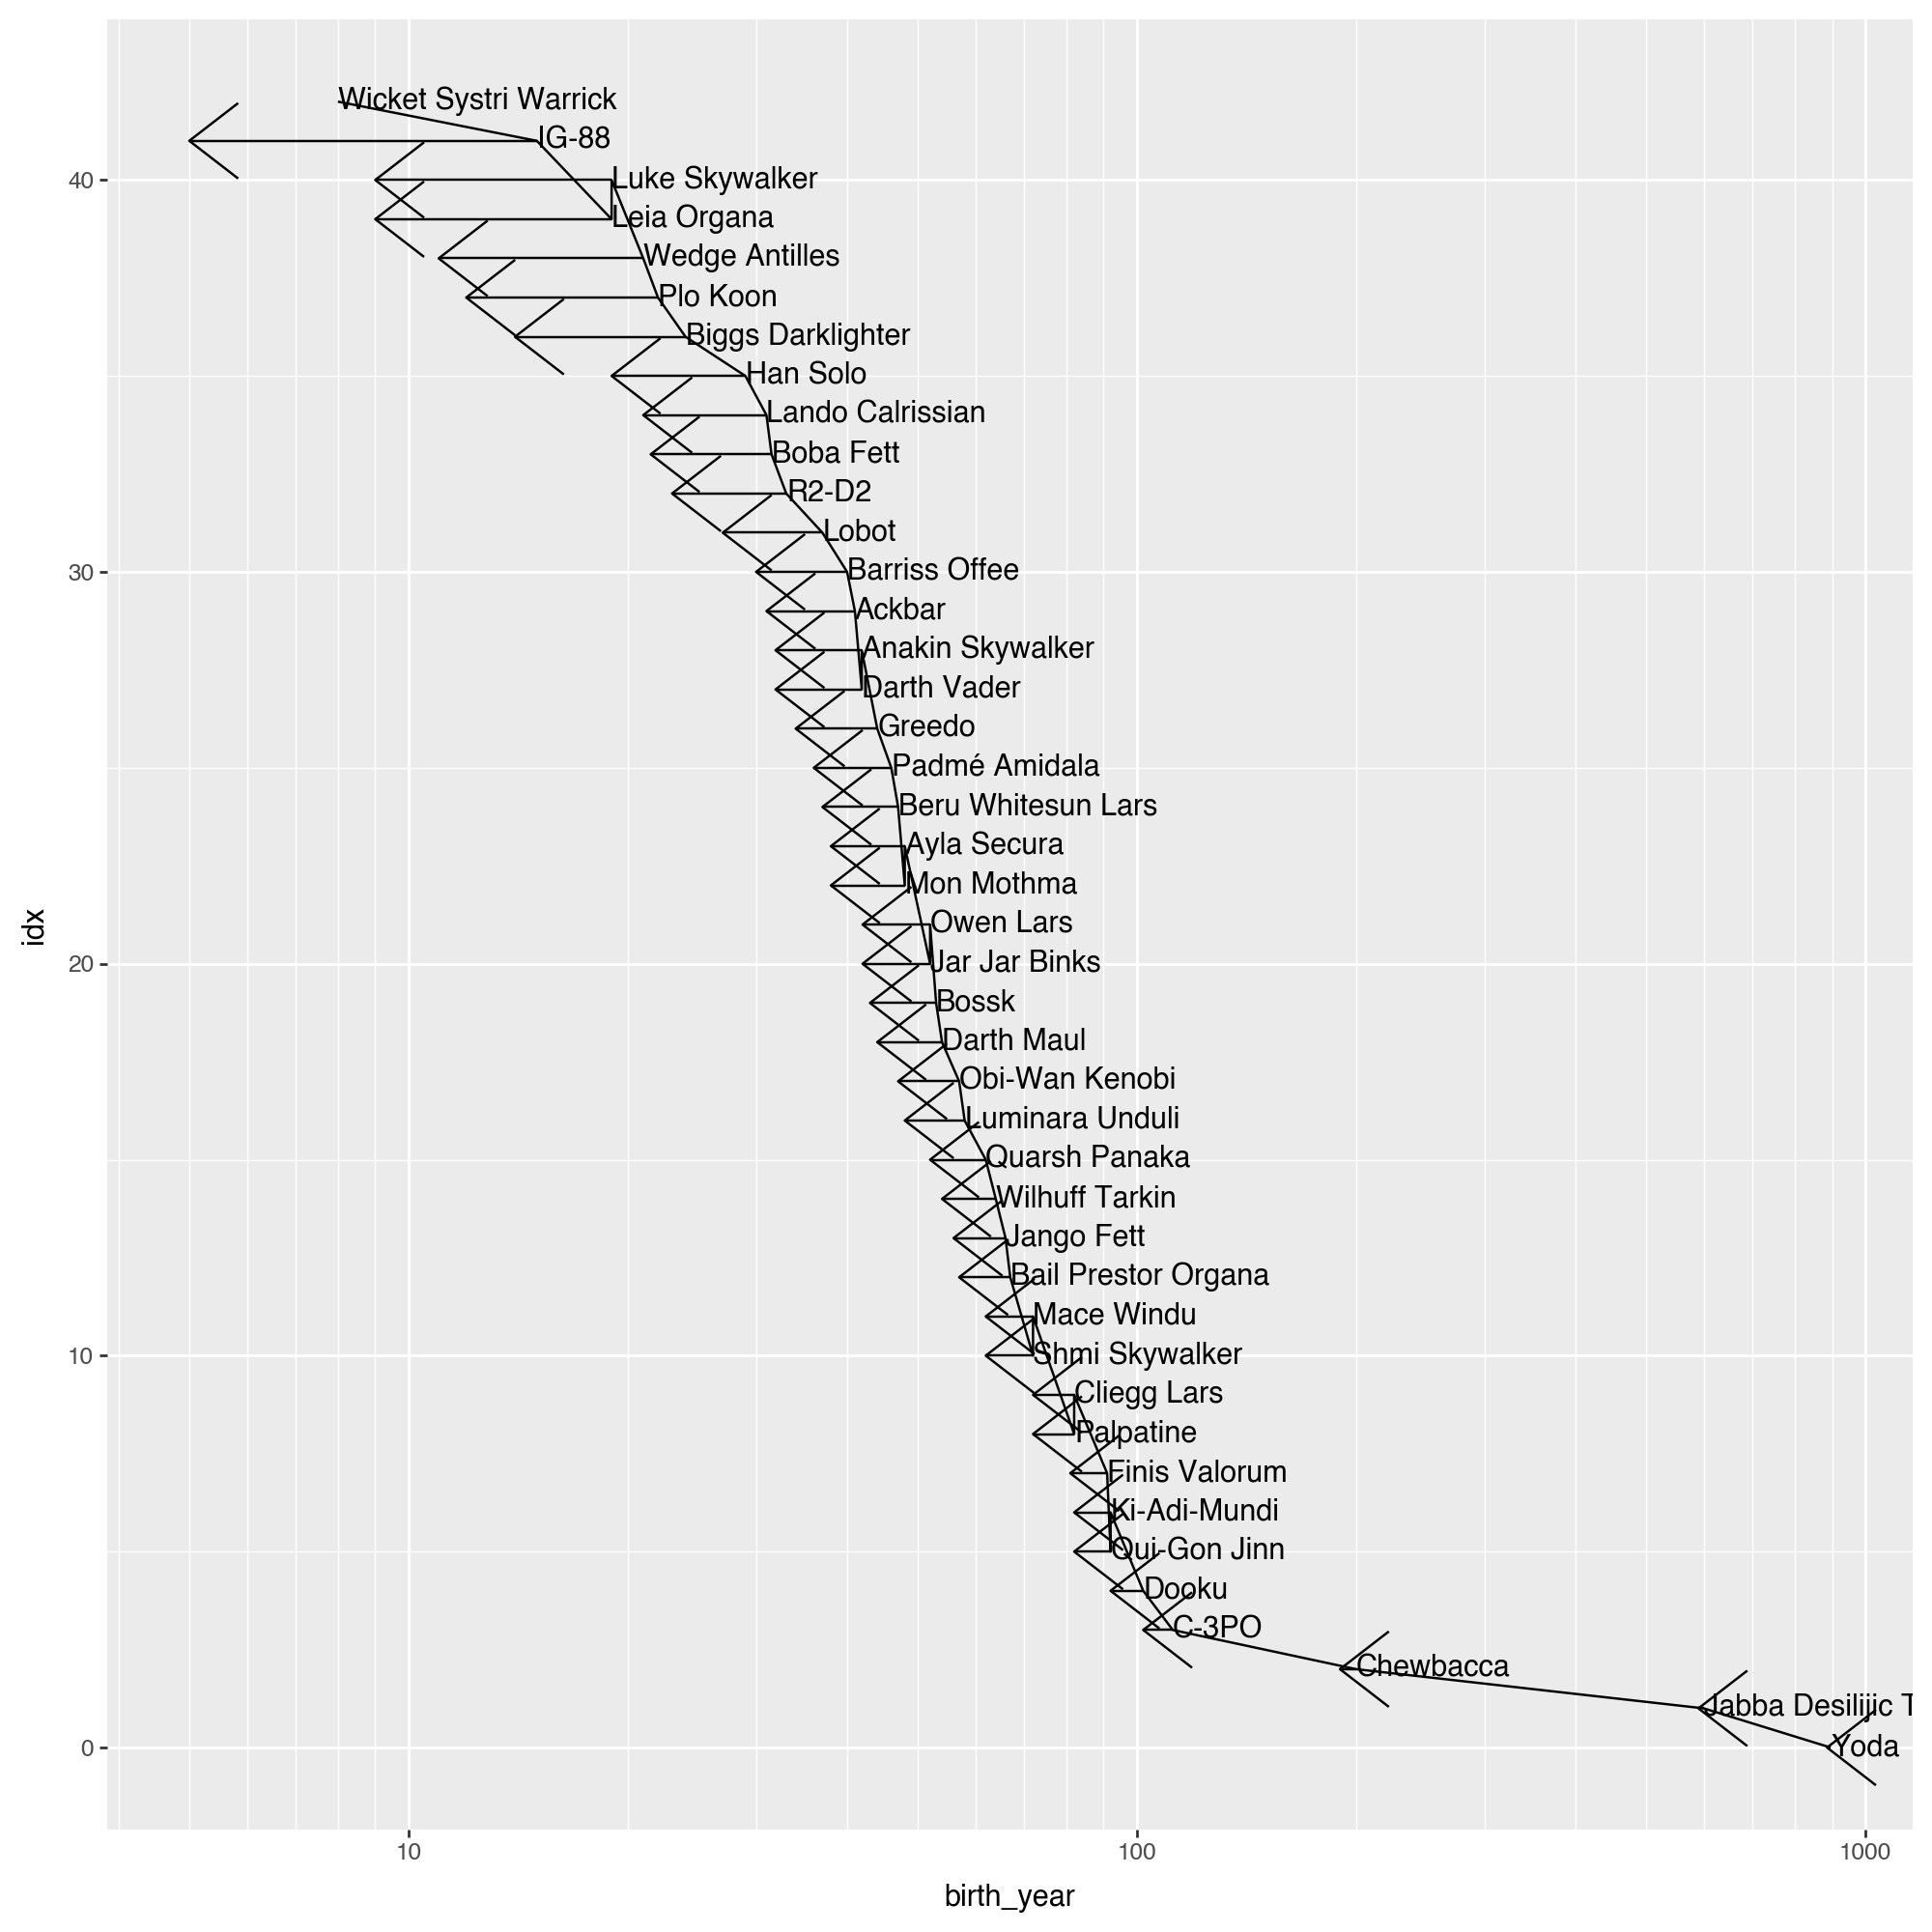

In [85]:
# GRAPH 2:
# line plot: birth_year variable
# text information/annotation

ordered_births = (
    starwars[['name', 'birth_year']]
    .dropna(subset='birth_year')
    .sort_values('birth_year', ascending=False)
    .assign(idx=lambda df: np.arange(0, df.shape[0], 1))
    .assign(birth_year_2=lambda df: df.birth_year-10)
)

print('Dataset')
print(ordered_births.reset_index().head(n=5))

print('\nPlot')
(
    pn.ggplot(data=ordered_births)+
    pn.aes(x='birth_year', y='idx', label='name')+
    #pn.geom_point()+
    pn.geom_line()+
    pn.geom_segment(pn.aes(yend='idx', xend='birth_year_2'), arrow=pn.arrow(angle=30, length=0.2, ends="last", type="open"))+
    pn.geom_text(ha='left')+
    pn.scale_x_log10()+
    pn.theme(figure_size=(10, 10))
)

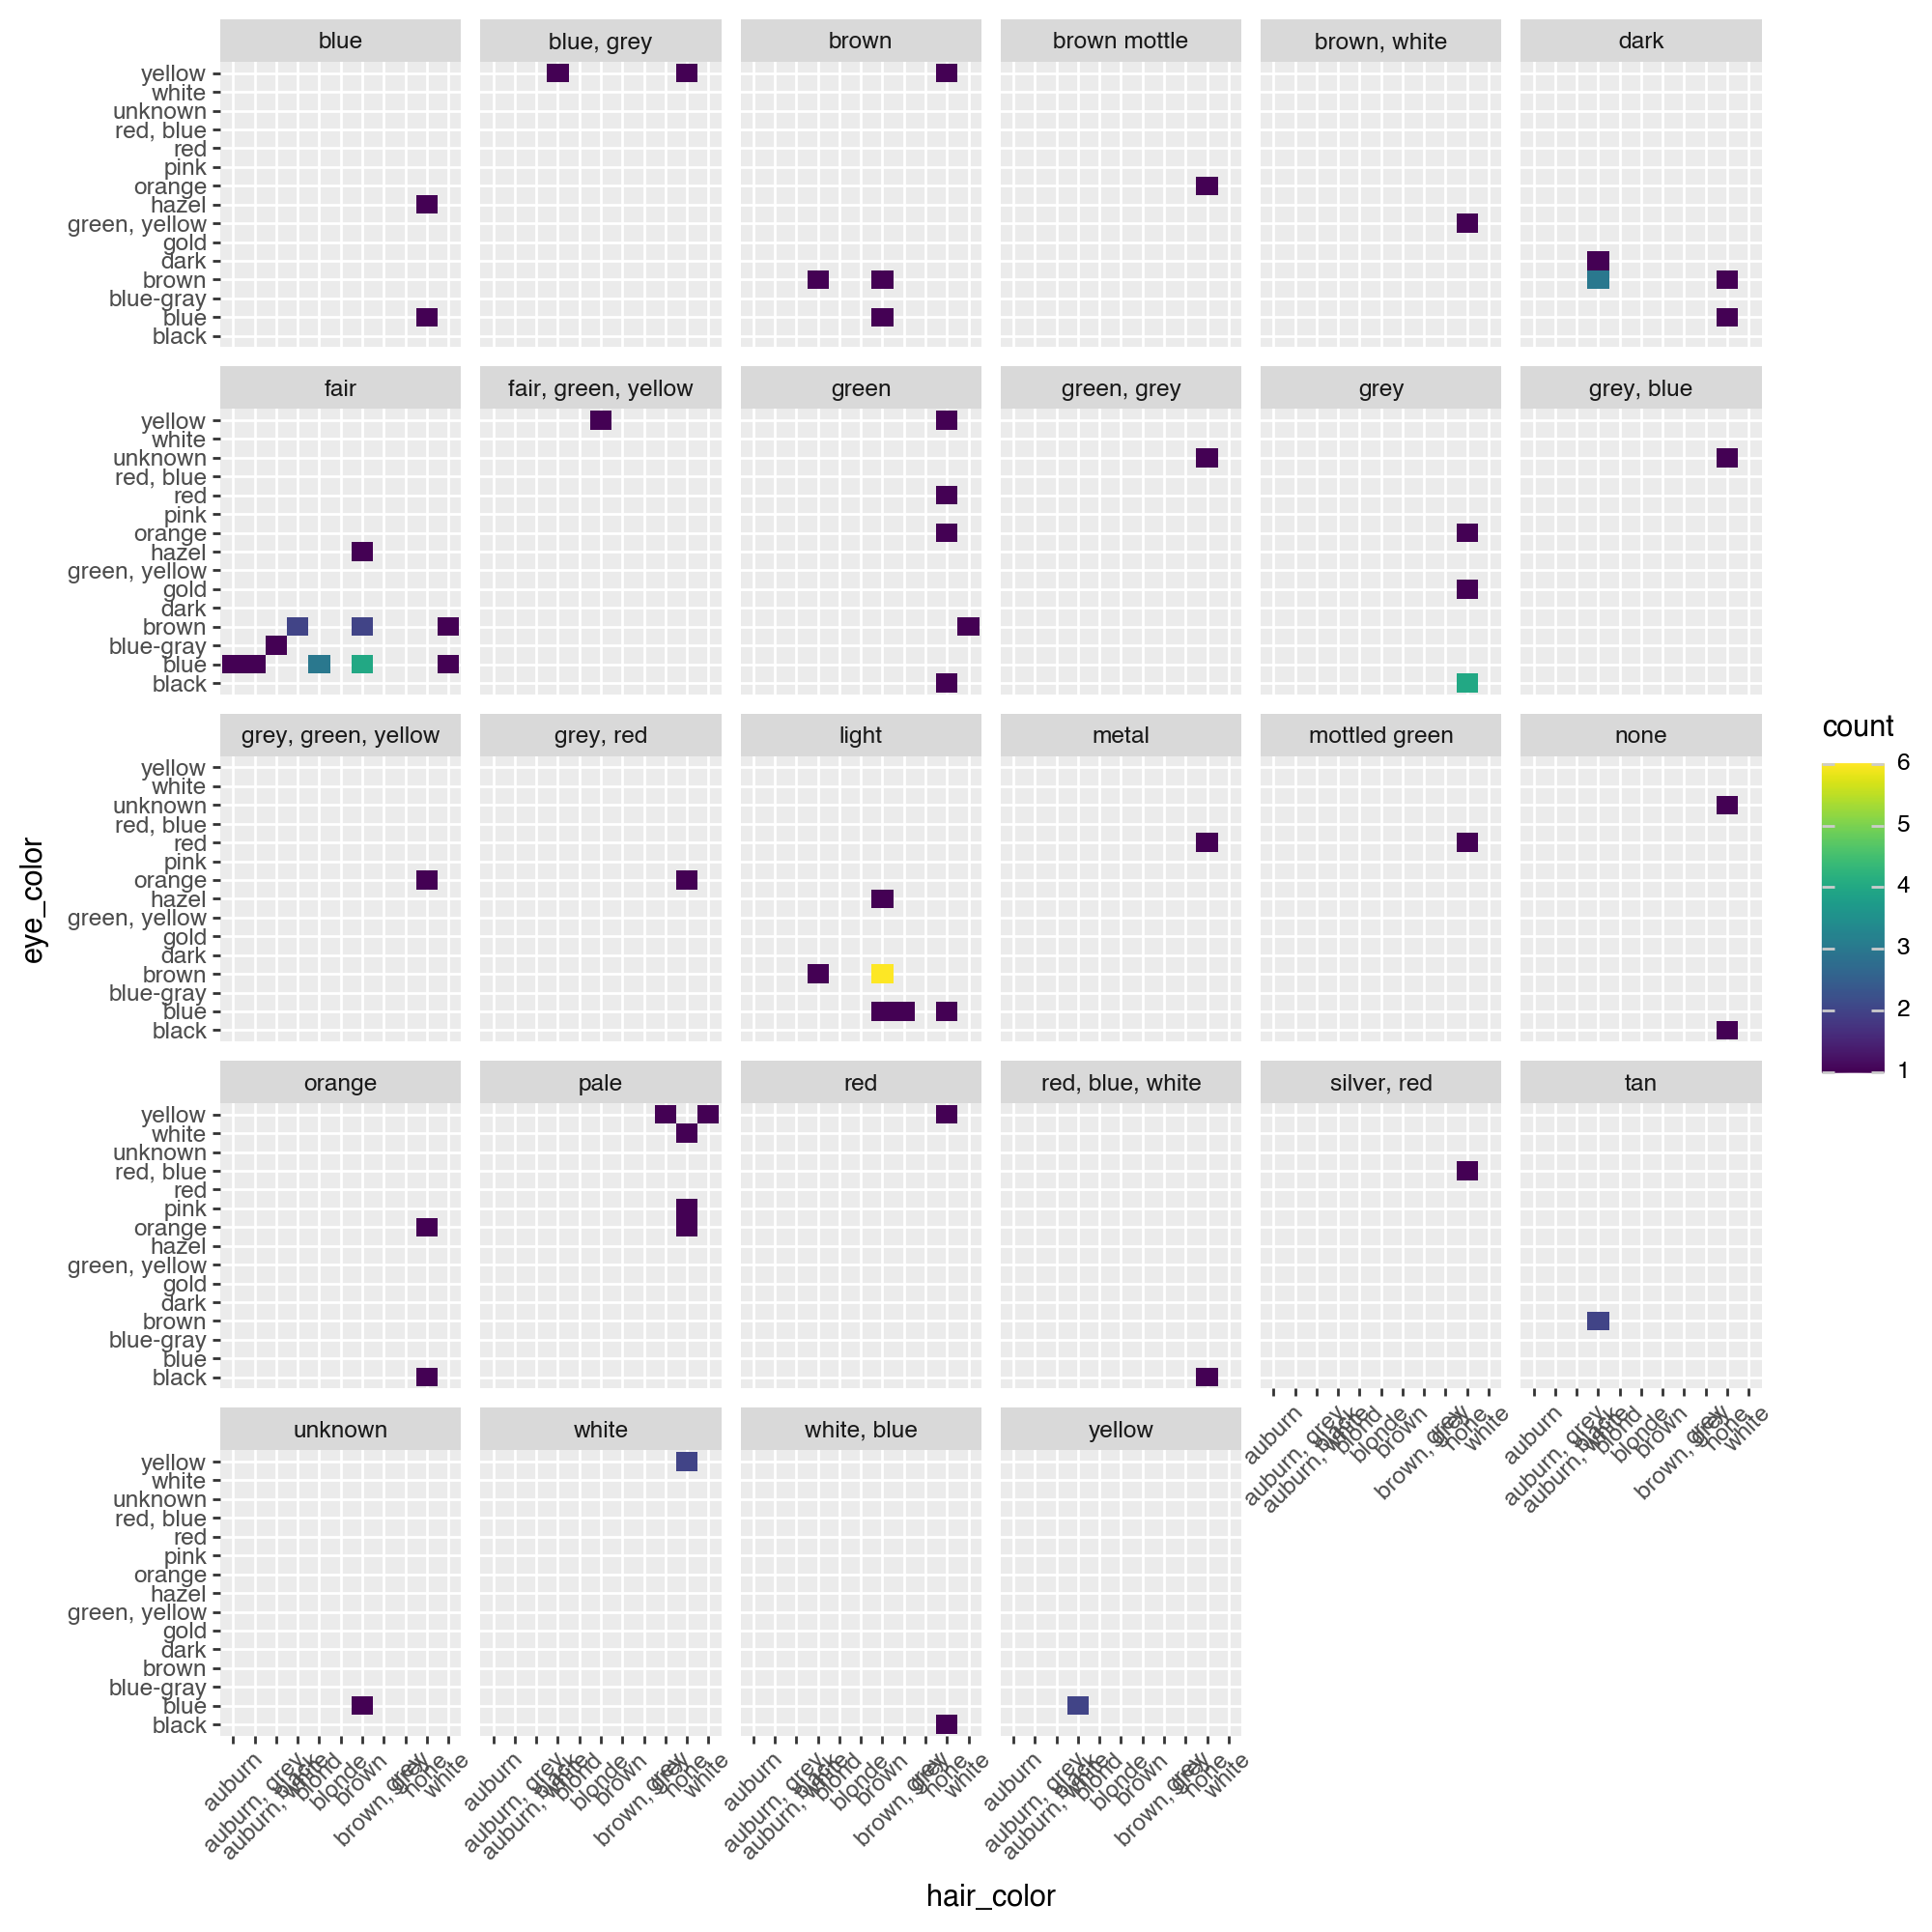

In [70]:
# GRAPH 3:
# barplot-style graph: eye-color / hair color / skin color

color_combo_count = starwars.value_counts(['hair_color', 'eye_color', 'skin_color']).reset_index()

(
    pn.ggplot(data=color_combo_count)+
    pn.aes(x='hair_color', y='eye_color', text='count', fill='count')+
    pn.geom_tile()+
    pn.facet_wrap('skin_color')+
    pn.theme(figure_size=(10,10), axis_text_x=pn.element_text(angle=45))
)